In [1]:
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost
from sklearn import preprocessing

In [2]:
data_node = pd.read_csv('node_feat.txt', sep=' ', header =None)
data_node.head(5)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.077034,-0.065027,-0.135552,0.007305,-0.019618,-0.129522,-0.394962,-0.096774,-0.549495,-0.229680,...,0.329416,0.634487,-0.183202,0.280506,0.017737,-0.141899,0.300271,-0.148616,0.042472,-0.092819
1,0.090406,-0.055498,-0.199454,-0.073101,0.129980,-0.168792,-0.498300,0.012366,-0.517318,-0.344800,...,0.262000,0.534585,-0.284113,0.193362,-0.017993,0.133143,0.415925,-0.205510,-0.057315,-0.221824
2,0.036018,-0.276833,-0.006313,0.365836,-0.054446,-0.388111,-0.310889,-0.128666,-0.691407,-0.319269,...,0.416217,0.616074,-0.175263,0.126960,0.048850,0.135687,0.397666,0.022077,0.115069,-0.050359
3,0.103949,0.141362,-0.234800,0.038294,0.029006,-0.042764,-0.260278,-0.073697,-0.443563,-0.339663,...,0.144633,0.384818,-0.301781,0.235658,-0.114685,0.138715,0.108334,-0.113345,-0.067795,-0.181579
4,-0.031268,0.008753,-0.352797,-0.175202,0.124375,-0.166064,-0.467233,-0.056786,-0.466632,-0.372931,...,0.415152,0.578069,-0.262672,0.017259,-0.017925,0.197143,0.425531,-0.134342,0.073450,-0.063862


In [3]:
data_node.describe()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,12588.000000,12588.000000,12588.000000,12588.000000,12588.000000,12588.000000,12588.000000,12588.000000,12588.000000,12588.000000,...,12588.000000,12588.000000,12588.000000,12588.000000,12588.000000,12588.000000,12588.000000,12588.000000,12588.000000,12588.000000
mean,0.090193,-0.079525,-0.191610,0.030007,0.008997,0.072283,-0.252537,-0.103589,-0.402835,-0.342028,...,0.299722,0.337550,-0.223755,0.223197,0.050400,-0.032009,0.226407,0.038605,0.011955,-0.065193
std,0.121774,0.113718,0.123126,0.132649,0.133527,0.188416,0.129135,0.113652,0.158540,0.122041,...,0.120253,0.132676,0.207476,0.172227,0.133497,0.142489,0.252871,0.160819,0.114222,0.158416
min,-0.838912,-0.946322,-0.787688,-0.728387,-0.584124,-0.840386,-0.876168,-0.758103,-1.257275,-1.231022,...,-0.278896,-0.247378,-1.210938,-0.534148,-0.668559,-0.764766,-0.778509,-0.427536,-0.468028,-0.611171
25%,0.015398,-0.148150,-0.267881,-0.051878,-0.077811,-0.040884,-0.329359,-0.176297,-0.488478,-0.411889,...,0.225654,0.252785,-0.318863,0.118512,-0.037451,-0.124591,0.198051,-0.066524,-0.061589,-0.173881
50%,0.088614,-0.073038,-0.192843,0.030884,0.002645,0.047862,-0.254719,-0.109022,-0.404042,-0.333987,...,0.303901,0.335452,-0.189443,0.206041,0.041247,-0.037187,0.300782,-0.000689,0.006209,-0.093370
75%,0.167183,-0.004077,-0.118292,0.112625,0.088846,0.150181,-0.182835,-0.035248,-0.320991,-0.265317,...,0.377640,0.417276,-0.095346,0.301201,0.127548,0.052250,0.376541,0.094537,0.077484,0.015797
max,0.835071,0.422870,0.760966,0.720146,0.877524,1.170290,0.586612,0.598054,0.714933,0.607762,...,0.876032,1.305560,0.986242,1.008080,0.785764,0.840138,0.955922,0.791234,0.784560,0.655755


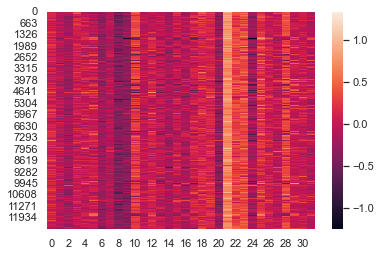

In [4]:
import seaborn as sns; sns.set_theme()
ax = sns.heatmap(data_node)

In [5]:
data_edges = pd.read_csv('train_edges.txt', sep=' ', header = None)
data_UnlEdges = pd.read_csv('unlabeled_edges.txt', sep=' ', header = None)
data_edges.head(5)

,0,1
0,0,2
1,1,19
2,1,21
3,1,23
4,1,15


In [6]:
data_edges.value_counts

<bound method DataFrame.value_counts of            0      1
0          0      2
1          1     19
2          1     21
3          1     23
4          1     15
...      ...    ...
14317  12584  12587
14318  12585   8677
14319  12585   6166
14320  12586  10708
14321  12586  10728

[14322 rows x 2 columns]>

In [7]:
data_UnlEdges.head(5)

,0,1
0,11468,1677
1,3508,8904
2,6724,2318
3,11662,9673
4,2035,3693


In [8]:
print('data_node shape: ', data_node.shape)
print('data_edges shape: ', data_edges.shape)
print('data_UnlEdges shape: ', data_UnlEdges.shape)

data_node shape:  (12588, 32)
data_edges shape:  (14322, 2)
data_UnlEdges shape:  (44014, 2)


In [9]:
data_edges.head(5)

,0,1
0,0,2
1,1,19
2,1,21
3,1,23
4,1,15


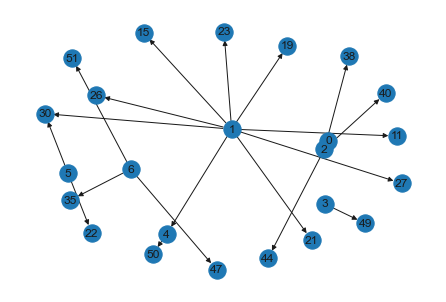

In [10]:
import networkx as nx
G = nx.DiGraph() #directional
G.add_edges_from([(r1, r2) for r1, r2 in zip(data_edges[0][0:20], data_edges[1][0:20])]) #draw first 20
nx.draw(G, cmap = plt.get_cmap('jet'), with_labels=True)

In [11]:
train_nodes = list(data_edges.itertuples(index=False, name=None))
def negative_sampling(data_edge):
    ### BEGIN SOLUTION
    pos_edges = data_edge
    nodes = np.unique(pos_edges)
    neg_edges = []
    for u, v in tqdm(pos_edges):
        while True:
            neg_v = np.random.choice(nodes)
            if (u == neg_v) or ((u, neg_v) in pos_edges) or ((neg_v, u) in pos_edges):
                continue
            neg_edges.append((u, neg_v))
            break
    return neg_edges

In [12]:
neg_edges = negative_sampling(train_nodes)
pos_edges = train_nodes

  0%|          | 0/14322 [00:00<?, ?it/s]

In [13]:
len(pos_edges)

14322

In [14]:
x = np.random.RandomState(seed=42).permutation(pos_edges + neg_edges)
#x = np.random.permutation()
y = [int((u, v) in pos_edges) for (u, v) in x]

x_df = pd.DataFrame(x) #neg + pos

In [15]:
G.add_edges_from([(r1, r2) for r1, r2 in zip(x_df[0], x_df[1])])
nodes = list(G.nodes())
n = G.number_of_nodes()
m = G.number_of_edges()
print('Number of nodes:', n)
print('Number of edges:', m)

Number of nodes: 12588
Number of edges: 28643


In [16]:
pr_dict = nx.pagerank(G)
degree_list = nx.degree(G)
degCent = nx.degree_centrality(G)

In [17]:
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True, k = 50)

In [18]:
hubs_dict, auth_dict = nx.hits(G)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/networkx/algorithms/link_analysis/hits_alg.py:78: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, nodelist=list(G), dtype=float)


In [19]:
degree_dict = {}
for i, j  in degree_list:
    degree_dict[i] = j
len(degree_dict)


12588

In [20]:
data_node_new = data_node

In [21]:
from node2vec import Node2Vec as n2v
# Generate walks
NV_dimensions=5
g_emb = n2v(G, dimensions=NV_dimensions)

# Learn embeddings 
model_emb = g_emb.fit(window=5, min_count=1)

emb_df = (
    pd.DataFrame(
        [model_emb.wv.get_vector(str(n)) for n in G.nodes()],
        index = G.nodes
    )
)

Computing transition probabilities:   0%|          | 0/12588 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|████████████████| 10/10 [00:06<00:00,  1.56it/s]


In [22]:
emb_df.head(NV_dimensions)

,0,1,2,3,4
0,0.855875,0.374520,0.268222,-0.891154,-0.554853
2,0.736508,-0.029042,0.477638,-0.818174,-0.321644
1,1.031778,0.305861,0.571008,-0.819784,-0.661985
19,0.075976,0.155548,0.090145,0.182809,-0.033067
21,1.359844,0.395386,0.845638,-1.221835,-0.496278


In [23]:

nodeN2V_dict = []
for i in range(NV_dimensions):
    nodeN2V_dict.append('nodeN2V_dict{}'.format(i))

In [24]:
for j in range(NV_dimensions):
    nodeN2V_dict[j] = {}
    for i in range(len(emb_df)):
        nodeN2V_dict[j][i] = emb_df[j][i]

In [25]:
nodeWeight_dict = []
for i in range(data_node.shape[1]):
    nodeWeight_dict.append('nodeWeight_dict{}'.format(i))

In [26]:
for j in range(data_node.shape[1]):
    nodeWeight_dict[j] = {}
    for i in range(len(data_node_new)):
        nodeWeight_dict[j][i] = data_node_new[j][i]

In [27]:
final_data_list = []
def transform_data(df, lr) :
    
    for index, row in df.iterrows():
        src = row[0]
        tgt = row[1]
        
        data_list = []
        data_list.append(pr_dict[src])
        data_list.append(hubs_dict[src])
        data_list.append(auth_dict[src])
        data_list.append(degCent[src])
        data_list.append(betCent[src])
        data_list.append(degree_dict[src])
        data_list.append(pr_dict[tgt])
        data_list.append(hubs_dict[tgt])
        data_list.append(auth_dict[tgt])
        data_list.append(degCent[tgt])
        data_list.append(betCent[tgt])
        data_list.append(degree_dict[tgt])
        
        nb_src = [n for n in G.neighbors(src)]
        nb_tgt = [c for c in G.neighbors(tgt)]
        nb_src_weight = 0
        nb_tgt_weight = 0
        for d in range(data_node.shape[1]):

            nb_src_weight = lr*(nodeWeight_dict[d][src] + sum(nodeWeight_dict[d][i] for i in nb_src))/(len(nb_src)+1)
            nb_tgt_weight = lr*(nodeWeight_dict[d][tgt] + sum(nodeWeight_dict[d][i] for i in nb_tgt))/(len(nb_tgt)+1)
            data_list.append(nb_src_weight)
            data_list.append(nb_tgt_weight)
        
        for i in range(NV_dimensions):
            data_list.append(nodeN2V_dict[i][src])
            data_list.append(nodeN2V_dict[i][tgt])
        

        data_list.append(y[index])
        
        final_data_list.append(data_list)

    col_list = ['SrcPageRank','SrcHubs', 'SrcAuth','SrcDegCnt','SrcBetCnt','SrcDeg',
           'TgtPageRank','TgtHubs', 'TgtAuth','TgtDegCnt','TgtBetCnt','TgtDeg',  'NSW0',
                'NSW1','NSW2','NSW3','NSW4','NSW5',
                'NSW6','NSW7','NSW8','NSW9','NSW10',
                'NSW11','NSW12','NSW13','NSW14','NSW15',
                'NSW16','NSW17','NSW18','NSW19','NSW20','NSW21', 'NSW22','NSW23','NSW24','NSW25',
                'NSW26','NSW27','NSW28','NSW29','NSW30',
                'NSW31','NTW0',
                'NTW1','NTW2','NTW3','NTW4','NTW5',
                'NTW6','NTW7','NTW8','NTW9','NTW10',
                'NTW11','NTW12','NTW13','NTW14','NTW15',
                'NTW16','NTW17','NTW18','NTW19','NTW20','NTW21','NTW22','NTW23','NTW24','NTW25',
                'NTW26','NTW27','NTW28','NTW29','NTW30',
                'NTW31', 'N2Vs0','N2Vs1','N2Vs2','N2Vs3','N2Vs4','N2Vt0','N2Vt1','N2Vt2','N2Vt3','N2Vt4','Link']
    new_df = pd.DataFrame(final_data_list, columns = col_list)        
    return new_df

In [ ]:

lrs = [1.5]
for lr in lrs:
    new_df = transform_data(x_df, lr)   
    x_all = new_df.drop('Link', axis =1)
    y_all = new_df['Link']
    X_train, X_test, y_train, y_test = train_test_split(x_all, y_all, test_size=0.2, random_state=42)
    classifier = xgboost.XGBClassifier()
    classifier.fit(X_train, y_train)

    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)
    acc_train = accuracy_score(y_train, y_train_pred)
    acc_test = accuracy_score(y_test, y_test_pred)
    print('acc_train: ', acc_train)
    print('acc_test: ', acc_test)


In [ ]:
#new_df.describe()

In [ ]:
#new_df.corr()
dsa

In [ ]:
#new_df.shape

In [ ]:
#x_all['SrcDeg'] = x_all['SrcDeg'] /x_all['SrcDeg'].abs().max()

#x_all['SrcDeg'] = (x_all['SrcDeg'] - x_all['SrcDeg'].min())/(x_all['SrcDeg'].max() - x_all['SrcDeg'].min())

In [ ]:
test_nodes = list(data_UnlEdges.itertuples(index=False, name=None))

In [ ]:
G.add_edges_from([(r1, r2) for r1, r2 in zip(data_UnlEdges[0], data_UnlEdges[1])])
nodes = list(G.nodes())
n = G.number_of_nodes()
m = G.number_of_edges()
print('Number of nodes:', n)
print('Number of edges:', m)

In [ ]:
pr_dict = nx.pagerank(G)
degree_list = nx.degree(G)
degCent = nx.degree_centrality(G)
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True, k = 50)
hubs_dict, auth_dict = nx.hits(G)
degree_dict = {}
for i, j  in degree_list:
    degree_dict[i] = j
len(degree_dict)

In [ ]:
data_list_test = []
def transform_data_test(df, lr) :
    
    for index, row in df.iterrows():
        src = row[0]
        tgt = row[1]
        
        data_list = []
        data_list.append(pr_dict[src])
        data_list.append(hubs_dict[src])
        data_list.append(auth_dict[src])
        data_list.append(degCent[src])
        data_list.append(betCent[src])
        data_list.append(degree_dict[src])
        data_list.append(pr_dict[tgt])
        data_list.append(hubs_dict[tgt])
        data_list.append(auth_dict[tgt])
        data_list.append(degCent[tgt])
        data_list.append(betCent[tgt])
        data_list.append(degree_dict[tgt])
        
        nb_src = [n for n in G.neighbors(src)]
        nb_tgt = [c for c in G.neighbors(tgt)]
        nb_src_weight = 0
        nb_tgt_weight = 0
        for d in range(data_node.shape[1]):

            nb_src_weight = lr*(nodeWeight_dict[d][src] + sum(nodeWeight_dict[d][i] for i in nb_src))/(len(nb_src)+1)
            nb_tgt_weight = lr*(nodeWeight_dict[d][tgt] + sum(nodeWeight_dict[d][i] for i in nb_tgt))/(len(nb_tgt)+1)
            data_list.append(nb_src_weight)
            data_list.append(nb_tgt_weight)
        
        for i in range(NV_dimensions):
            data_list.append(nodeN2V_dict[i][src])
            data_list.append(nodeN2V_dict[i][tgt])

        
        data_list_test.append(data_list)

    col_list = ['SrcPageRank','SrcHubs', 'SrcAuth','SrcDegCnt','SrcBetCnt','SrcDeg',
           'TgtPageRank','TgtHubs', 'TgtAuth','TgtDegCnt','TgtBetCnt','TgtDeg',  'NSW0',
                'NSW1','NSW2','NSW3','NSW4','NSW5',
                'NSW6','NSW7','NSW8','NSW9','NSW10',
                'NSW11','NSW12','NSW13','NSW14','NSW15',
                'NSW16','NSW17','NSW18','NSW19','NSW20','NSW21', 'NSW22','NSW23','NSW24','NSW25',
                'NSW26','NSW27','NSW28','NSW29','NSW30',
                'NSW31','NTW0',
                'NTW1','NTW2','NTW3','NTW4','NTW5',
                'NTW6','NTW7','NTW8','NTW9','NTW10',
                'NTW11','NTW12','NTW13','NTW14','NTW15',
                'NTW16','NTW17','NTW18','NTW19','NTW20','NTW21','NTW22','NTW23','NTW24','NTW25',
                'NTW26','NTW27','NTW28','NTW29','NTW30',
                'NTW31', 'N2Vs0','N2Vs1','N2Vs2','N2Vs3','N2Vs4','N2Vt0','N2Vt1','N2Vt2','N2Vt3','N2Vt4']
    new_df = pd.DataFrame(data_list_test, columns = col_list)        
    return new_df

In [ ]:
lr = 0.05
new_df_test = transform_data_test(data_UnlEdges, lr)        
print(len(data_list_test))        
print(len(new_df))

In [ ]:
x_all_test = new_df_test


In [ ]:
#x_all_test['SrcDeg'] = (x_all_test['SrcDeg'] - x_all_test['SrcDeg'].min())/(x_all_test['SrcDeg'].max() - x_all_test['SrcDeg'].min())

In [ ]:
y_test_pred = classifier.predict(x_all_test)

In [ ]:
y_test_pred

In [ ]:
f = open('pred_link.txt', 'w')
for item in y_test_pred:
    f.write("%s\n" % item)
# Close opend file
f.close()